In [2]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

In [3]:
import pandas as pd

#Read csv
general_data = pd.read_csv('Donnees/general_data.csv')
employee_survey_data = pd.read_csv('Donnees/employee_survey_data.csv')
manager_survey_data = pd.read_csv('Donnees/manager_survey_data.csv')
in_time = pd.read_csv('Donnees/in_time.csv')
out_time = pd.read_csv('Donnees/out_time.csv')

#Join general + employee + manager
general_employee = pd.merge(employee_survey_data, general_data, on='EmployeeID', how='inner')
general_employee_manager = pd.merge(general_employee, manager_survey_data, on='EmployeeID', how='inner')

In [4]:
general_employee_manager.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0           1                      3.0              4.0              2.0   51   
1           2                      3.0              2.0              4.0   31   
2           3                      2.0              2.0              1.0   32   
3           4                      4.0              4.0              3.0   38   
4           5                      4.0              1.0              3.0   32   

  Attrition     BusinessTravel              Department  DistanceFromHome  \
0        No      Travel_Rarely                   Sales                 6   
1       Yes  Travel_Frequently  Research & Development                10   
2        No  Travel_Frequently  Research & Development                17   
3        No         Non-Travel  Research & Development                 2   
4        No      Travel_Rarely  Research & Development                10   

   Education  ... PercentSalaryHike  StandardHours StockOptionLevel  \
0          2  ...                11              8                0   
1          1  ...                23              8                1   
2          4  ...                15              8                3   
3          5  ...                11              8                3   
4          1  ...                12              8                2   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.0                     6              1   
1                6.0                     3              5   
2                5.0                     2              5   
3               13.0                     5              8   
4                9.0                     2              6   

   YearsSinceLastPromotion  YearsWithCurrManager JobInvolvement  \
0                        0                     0              3   
1                        1                     4              2   
2                        0                     3              3   
3                        7                     5              2   
4                        0                     4              3   

   PerformanceRating  
0                  3  
1                  4  
2                  3  
3                  3  
4                  3  

[5 rows x 29 columns]

c:\Program Files\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Program Files\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Program Files\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='EmployeeID', ylabel='EmployeeID'>,
        <Axes: xlabel='EnvironmentSatisfaction', ylabel='EmployeeID'>,
        <Axes: xlabel='JobSatisfaction', ylabel='EmployeeID'>,
        <Axes: xlabel='WorkLifeBalance', ylabel='EmployeeID'>,
        <Axes: xlabel='Age', ylabel='EmployeeID'>,
        <Axes: xlabel='DistanceFromHome', ylabel='EmployeeID'>,
        <Axes: xlabel='Education', ylabel='EmployeeID'>,
        <Axes: xlabel='EmployeeCount', ylabel='EmployeeID'>,
        <Axes: xlabel='JobLevel', ylabel='EmployeeID'>,
        <Axes: xlabel='MonthlyIncome', ylabel='EmployeeID'>,
        <Axes: xlabel='NumCompaniesWorked', ylabel='EmployeeID'>,
        <Axes: xlabel='PercentSalaryHike', ylabel='EmployeeID'>,
        <Axes: xlabel='StandardHours', ylabel='EmployeeID'>,
        <Axes: xlabel='StockOptionLevel', ylabel='EmployeeID'>,
        <Axes: xlabel='TotalWorkingYears', ylabel='EmployeeID'>,
        <Axes: xlabel='TrainingTimesLastYear', ylabel='EmployeeID'>,
     

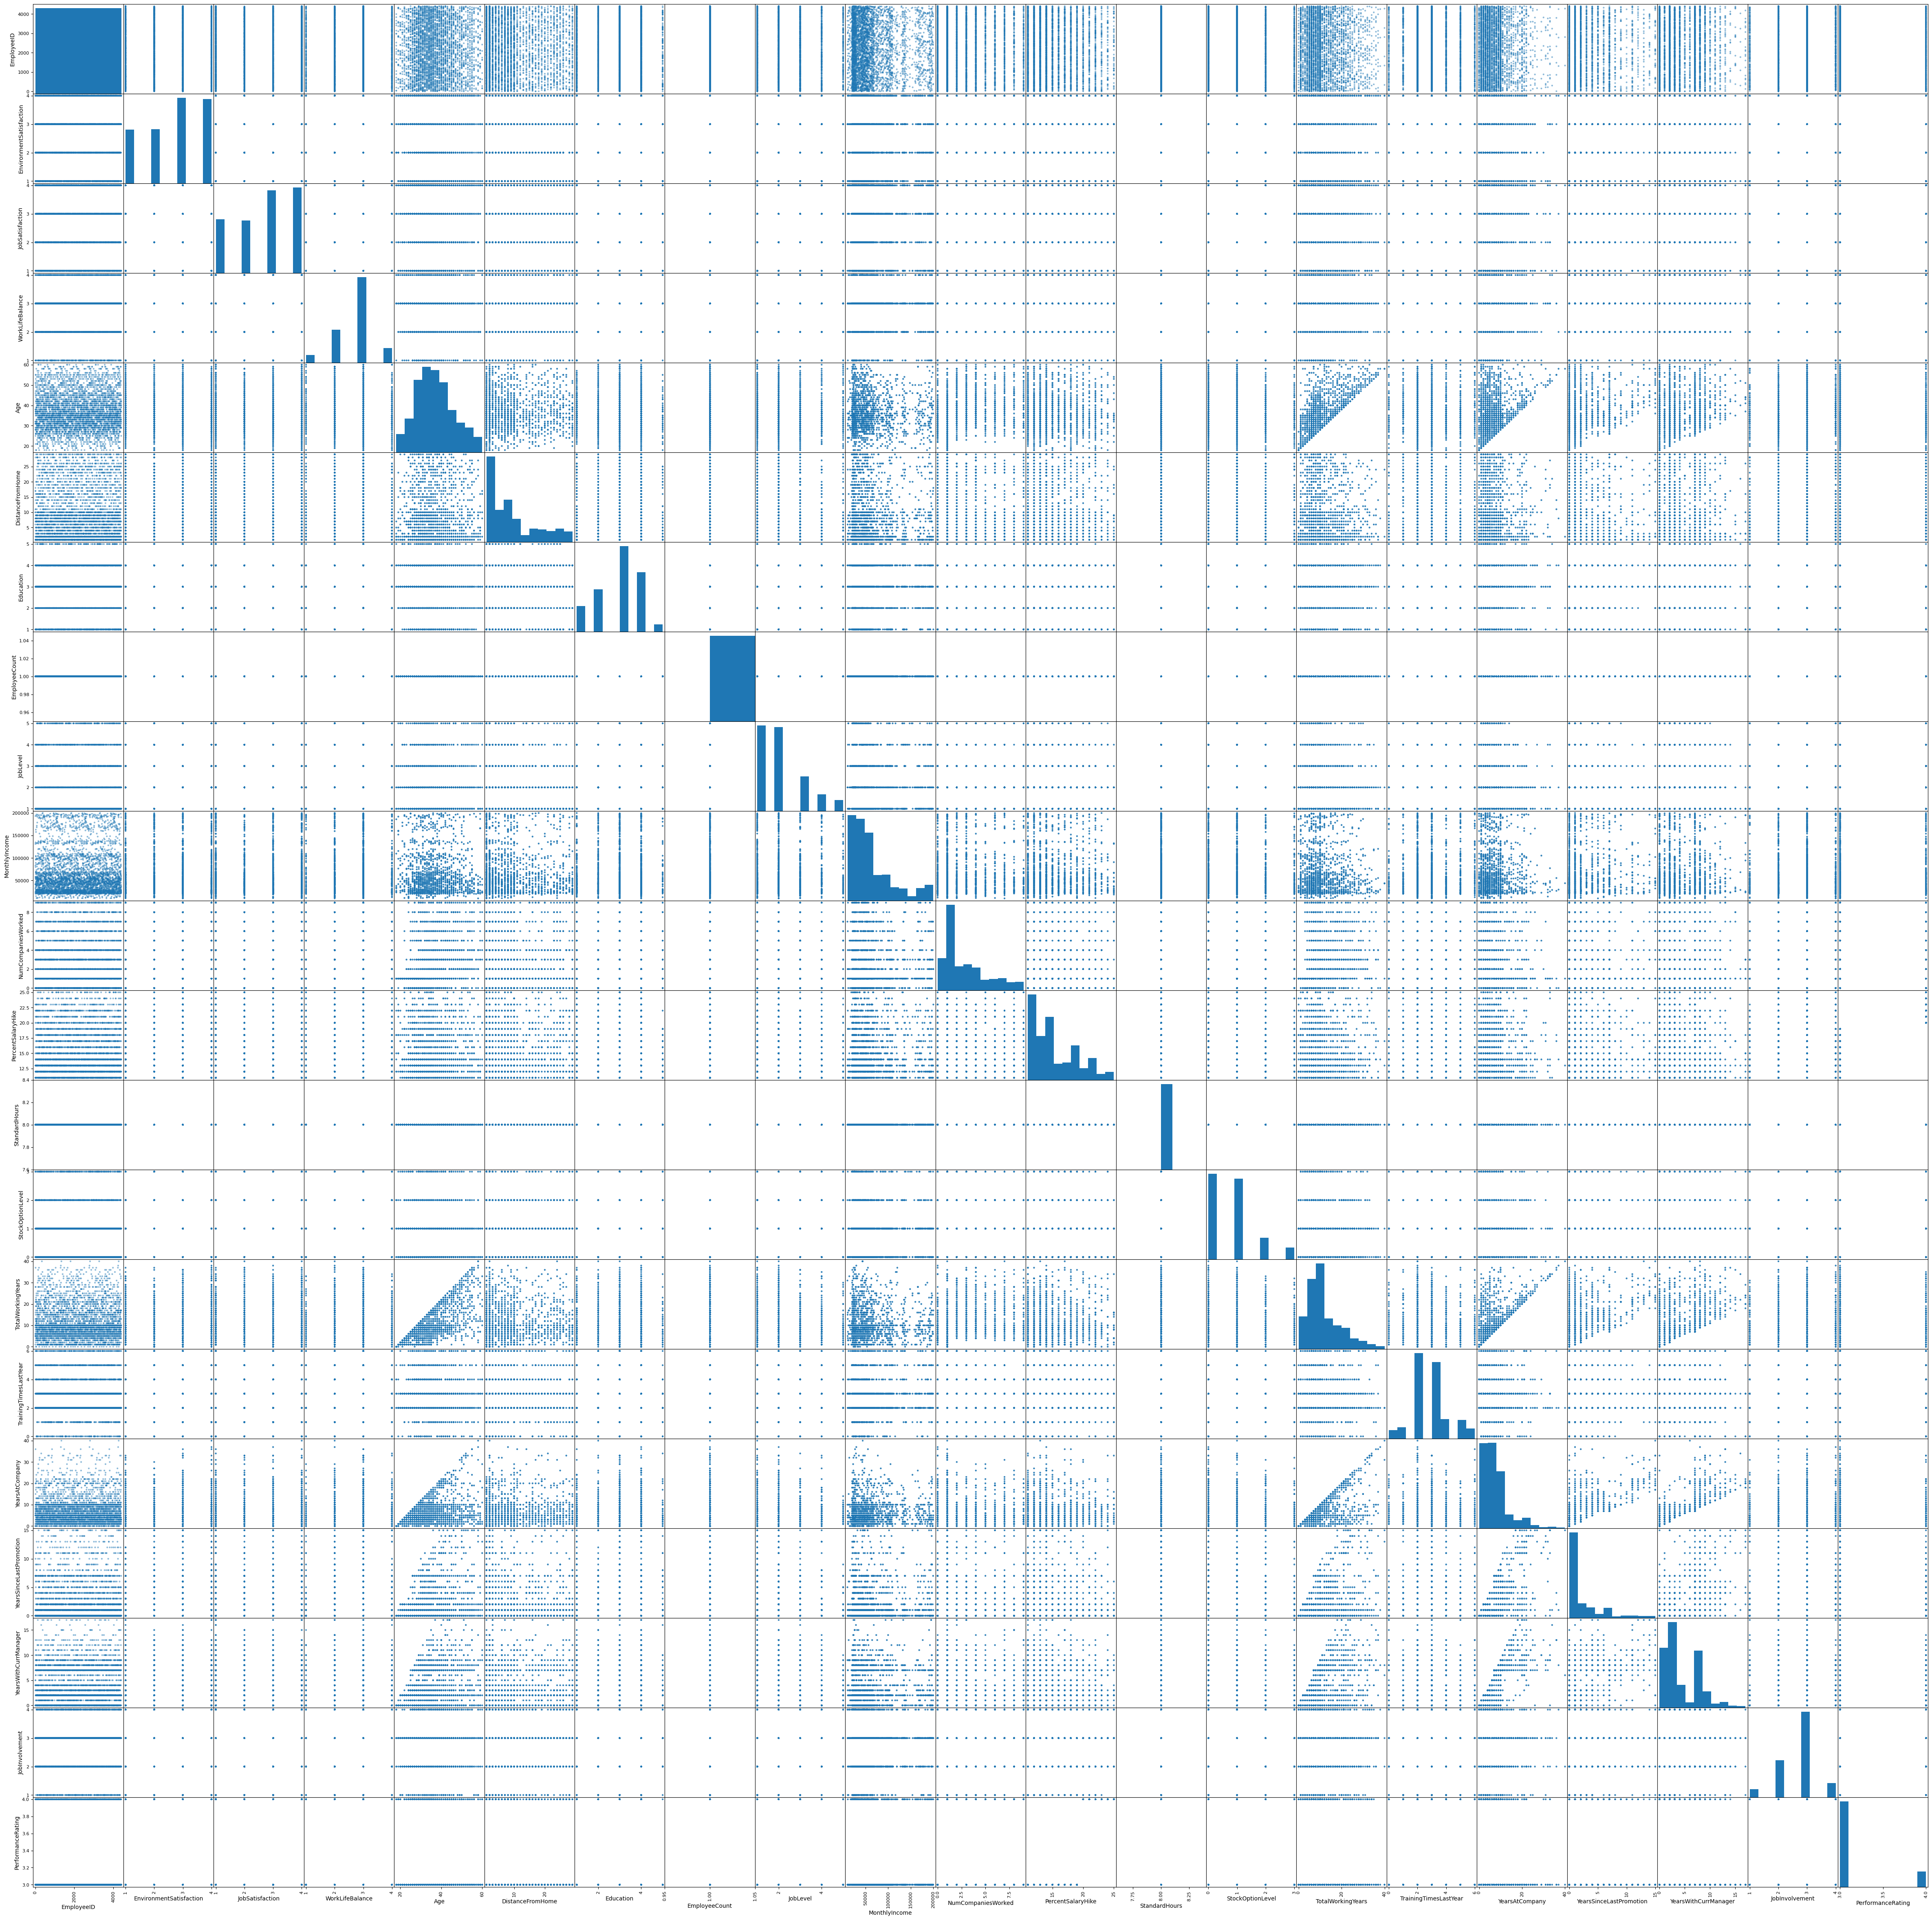

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(general_employee_manager, figsize=(60, 60))

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Une pipeline mais pas sûr qu'elle soit bien
def pipe(dataframe, array):

    num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])

    num_attribs = list(dataframe.select_dtypes(include=[np.number]) )
    cat_attribs = array

    full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attribs),
            ("cat", OneHotEncoder(), cat_attribs),
        ])
    
    return full_pipeline.fit_transform(dataframe)

#Exemple : general_employee_manager_prepared = pipe(general_employee_manager, ["Department","BusinessTravel","Attrition","EducationField","Gender","Over18"])